In [1]:
import os
from utils_sampling import *
from funcs_behavior_logistic_analysis import *

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 28})
plt.rcParams.update({'font.family': 'arial'})

In [3]:
datasetName = 'takahashi2016roesch2009burton2018Valid' # or 'initialTrainingValid'

# import data (valid trials only)
dataValid = pd.read_csv('data/' + datasetName + '.csv')

# mark if a trial is correct or not
dataValid['correctChoice'] = 1*(dataValid['odor']=='left') + 2*(dataValid['odor']=='right') + (dataValid['odor']=='free')*(
    1*((dataValid['blockType']=='short_long')|(dataValid['blockType']=='big_small')) +
    2*((dataValid['blockType']=='long_short')|(dataValid['blockType']=='small_big')) )
dataValid['correct'] = (dataValid['correctChoice'] == dataValid['choice'])

In [4]:
stanCodeName = 'logisticRegressionMultiVar'

### logistic regression: correct/incorrect free-choice vs number of trials of correct forced-choice following the last incorrect free-choice + intercept

In [5]:
analysisName = 'lastWrong_NCorrectForced_improvement'
fitName = datasetName + '_' + analysisName

In [6]:
# run hierarchical logistic regression (skip this if fits are already saved locally)
if not os.path.exists('model_fits/' + fitName + '_' + stanCodeName + '_allSamples.csv'):
    ratList, startSubject, NCorrectForcedBetweenList, accuracyList = prep_data(dataValid, fitName)
    dd = dict(P=1, Ns=dataValid['rat'].unique().size, Nt=len(ratList), startSubject=startSubject, X=np.array(NCorrectForcedBetweenList)[:,np.newaxis], y=np.array(accuracyList))
    fit = fitModel(modelName=stanCodeName, datasetName=fitName, dd=dd, samplingInfo=samplingInfo, moreControl={'max_treedepth':10, 'adapt_delta':0.99})

takahashi2016roesch2009burton2018Valid_lastWrong_NCorrectForced_improvement
(-0.022, 0.035)


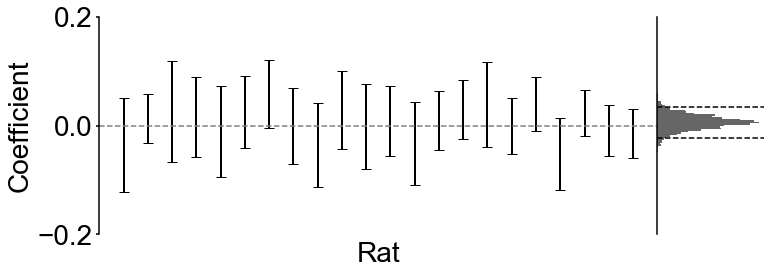

In [7]:
plot_hdi(fitName, stanCodeName, iRegressor=1, sort=False, reorder=True)

### Add trial index as an additional regressor

In [8]:
analysisName = 'lastWrong_NCorrectForced_improvement_wiTrial'
fitName = datasetName + '_' + analysisName

In [9]:
# run hierarchical logistic regression (skip this if fits are already saved locally)
if not os.path.exists('model_fits/'+fitName+'_'+stanCodeName+'_allSamples.csv'):
    ratList, startSubject, NCorrectForcedBetweenList, accuracyList = prep_data(dataValid, fitName)
    X = np.stack((np.array(NCorrectForcedBetweenList),np.array(iTrialList))).T
    dd = dict(P=2, Ns=dataValid['rat'].unique().size, Nt=len(ratList), startSubject=startSubject, X=X, y=np.array(accuracyList))
    fit = fitModel(modelName=stanCodeName, datasetName=fitName, dd=dd, samplingInfo=samplingInfo, moreControl={'max_treedepth':10, 'adapt_delta':0.99})

takahashi2016roesch2009burton2018Valid_lastWrong_NCorrectForced_improvement_wiTrial
(-0.035, 0.021)


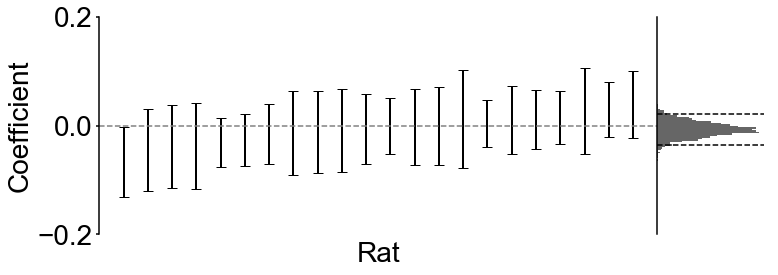

In [10]:
# plot the slope of interest
plot_hdi(fitName, stanCodeName, iRegressor=1)